In [2]:
# Add directory above current directory to path
import sys as SYS; SYS.path.insert(0, '..')

# for saving
import os

from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt

from src import setup
# setup.use_gpu()

In [3]:
from src import ( 
    measurements as measure,
    density_matrix as DM,
    simulation as sim,
    orders,
    order_rules,
    random_unitary,
    simulation)

from Scripts import simulation_CLI as cleo

In [4]:
import matplotlib.pyplot as plt 
import matplotlib.animation as animation
# Add directory above current directory to path
import sys as SYS; SYS.path.insert(0, '../..')
import h5py
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from src import ket as ket
from src import density_matrix as DM

In [ ]:
#These codes compress all the data into one hdf5 file

In [5]:
import sys as SYS; SYS.path.insert(0, '../..')
from Scripts import hdf5merge
hdf5merge.merge_hdf5_files("../data/greedy")

In [ ]:
import sys as SYS; SYS.path.insert(0, '../..')
from Scripts import hdf5merge
hdf5merge.merge_hdf5_files("../data/random")

In [ ]:
import sys as SYS; SYS.path.insert(0, '../..')
from Scripts import hdf5merge
hdf5merge.merge_hdf5_files("../data/landscape_maximizes")

In [ ]:
import sys as SYS; SYS.path.insert(0, '../..')
from Scripts import hdf5merge
hdf5merge.merge_hdf5_files("../data/mimic")

In [ ]:
#Converts the h5py file into a dictionary to get two qubit dms corresponding to (i,j) qubit index

In [5]:
newdata1 = dict(h5py.File("../data/random/random.hdf5"))
newdata2 = dict(h5py.File("../data/greedy/greedy.hdf5"))
newdata3 = dict(h5py.File("../data/mimic/mimic.hdf5"))
newdata4 = dict(h5py.File("../data/landscape_maximizes/landscape_maximizes.hdf5"))

In [ ]:
#code gets population and 2 qubit dms

In [6]:
def get_pops(data, n_qubits, connectivity,update_rule):
    #dimension 0 is each trial
    #dimension 1 is each time step
    #dimension 2 is each qubit
    result = []
    for trial in data[f'{n_qubits} qubits'][f'{connectivity} connectivity']['unitary energy subspace 1']:
        seed = trial.split(' ')[-1]
        dat = dict(data[f'{n_qubits} qubits'][f'{connectivity} connectivity']['unitary energy subspace 1'][f'unitary seed {seed}'][f'ordering seed {update_rule}']['pops'])
        dat = {int(k.split('(')[0]): dat[k] for k in dat}
        dat = np.array([np.array([dat[k][subkey][()] for subkey in sorted(dat[k])]) for k in sorted(dat)])
        result.append(dat)
    return(np.array(result))

def get_2_qbit_dms(data, n_qubits, connectivity,update_rule):
    basis = ket.canonical_basis(2)
    #dimension 0 is each trial
    #dimension 1 is each time step (recall that sampling step is 5 by default)
    #dimension 2 is qubit pair
    #dimension 3 and 4 is the 2 qubit density matrix
    result = []
    
    def to_tuple(string):
        tuple_elements = string.strip('()').split(',')
        return tuple(int(elem.strip()) for elem in tuple_elements)

    for trial in data[f'{n_qubits} qubits'][f'{connectivity} connectivity']['unitary energy subspace 1']:
        seed = trial.split(' ')[-1]
        dat = dict(data[f'{n_qubits} qubits'][f'{connectivity} connectivity']['unitary energy subspace 1'][f'unitary seed {seed}'][f'ordering seed {update_rule}']['two_qubit_dms'])
        dat = {int(k.split('(')[0]): dat[k] for k in dat}
        
        dat = np.array([{to_tuple(subkey):DM.DensityMatrix(dat[k][subkey],basis) for subkey in sorted(dat[k])} for k in sorted(dat)])
        result.append(dat)
    return(np.array(result))

In [ ]:
#Analysis begins: 

In [7]:
#For a given size, do all connectivity
size=8

In [ ]:
#get all twoqdms for C2

In [8]:
twoQdmsrandomc2 = get_2_qbit_dms(newdata1,size,"c2_2local","random")
twoQdmsgreedyc2 = get_2_qbit_dms(newdata2,size,"c2_2local","greedy")
twoQdmsmimicc2 = get_2_qbit_dms(newdata3,size,"c2_2local","mimic")
twoQdmslandscape_maxc2 = get_2_qbit_dms(newdata4,size,"c2_2local","landscape_maximizes")

In [ ]:
#get all twoqdms for C4

In [10]:
twoQdmsrandomc4 = get_2_qbit_dms(newdata1,size,"c4_2local","random")
twoQdmsgreedyc4 = get_2_qbit_dms(newdata2,size,"c4_2local","greedy")
twoQdmsmimicc4 = get_2_qbit_dms(newdata3,size,"c4_2local","mimic")
twoQdmslandscape_maxc4 = get_2_qbit_dms(newdata4,size,"c4_2local","landscape_maximizes")

In [ ]:
#get all twoqdms for C5

In [11]:
twoQdmsrandomc5 = get_2_qbit_dms(newdata1,size,"c5_2local","random")
twoQdmsgreedyc5 = get_2_qbit_dms(newdata2,size,"c5_2local","greedy")
twoQdmsmimicc5 = get_2_qbit_dms(newdata3,size,"c5_2local","mimic")
twoQdmslandscape_maxcc5 = get_2_qbit_dms(newdata4,size,"c5_2local","landscape_maximizes")

In [ ]:
#get all twoqdms for C6

In [12]:
twoQdmsrandomc6 = get_2_qbit_dms(newdata1,size,"c6_2local","random")
twoQdmsgreedyc6 = get_2_qbit_dms(newdata2,size,"c6_2local","greedy")
twoQdmsmimicc6 = get_2_qbit_dms(newdata3,size,"c6_2local","mimic")
twoQdmslandscape_maxc6 = get_2_qbit_dms(newdata4,size,"c6_2local","landscape_maximizes")

In [ ]:
#get all twoqdms for CN

In [13]:
twoQdmsrandomcn = get_2_qbit_dms(newdata1,size,"cN_2local","random")
twoQdmsgreedycn = get_2_qbit_dms(newdata2,size,"cN_2local","greedy")
twoQdmsmimiccn = get_2_qbit_dms(newdata3,size,"cN_2local","mimic")
twoQdmslandscape_maxcn = get_2_qbit_dms(newdata4,size,"cN_2local","landscape_maximizes")

In [9]:
#MI of every pair
def mutual_info_dicts(twoQdms, trial_index):
    mutual_info_list = []
    for time_step in twoQdms[trial_index]:
        mutual_info_dict = {}
        mutual_info = measure.mutual_information_of_every_pair_dict(time_step)
        # Filter out values below the precision threshold
        filtered_mutual_info = {k: v if v >= 1e-6 else 0 for k, v in mutual_info.items()}
        # Update the mutual_info_dict with the filtered mutual info for the current time step
        mutual_info_dict.update(filtered_mutual_info)
        # Append the mutual_info_dict to the list
        mutual_info_list.append(mutual_info_dict)
    return mutual_info_list

In [ ]:
#Mutual information in dictionary format ie (i,j) -> I_{ij} of a particular unitary seed where i,j are qubit index
#seed can range from 0 to 99
seed=20

In [11]:
MI_random = mutual_info_dicts(twoQdmsrandomcn, seed)
MI_greedy = mutual_info_dicts(twoQdmsgreedycn, seed)
MI_mimic = mutual_info_dicts(twoQdmsmimiccn, seed)
MI_landmax = mutual_info_dicts(twoQdmslandscape_maxcn, seed)

In [10]:
# Call the two_point_dict function for each trial index
# Get the list of dictionaries containing two point values for each time step
def create_adjacency_matrix_two_dim(two_point_dict, num_nodes):
    adjacency_matrix = [[0] * num_nodes for _ in range(num_nodes)]
    for (node1, node2), two_point_value in two_point_dict.items():
        adjacency_matrix[node1][node2] = two_point_value
        adjacency_matrix[node2][node1] = two_point_value  # Assuming undirected graph
    return adjacency_matrix

In [11]:
#create adjacency matrix

In [12]:
def adjacency_matrices_list_two_dim(twoQdms, trial_index, num_nodes, two_point_dicts):
    # Get the list of dictionaries containing mutual information values for each time step
    two_point_dicts_list = two_point_dicts(twoQdms, trial_index)
    # Create adjacency matrices for each time step
    adjacency_matrices = []
    for two_point_dict in two_point_dicts_list:
        adj_matrix = create_adjacency_matrix_two_dim(two_point_dict, num_nodes)
        adjacency_matrices.append(adj_matrix)
    return adjacency_matrices

In [ ]:
#Adjacency matrix of a particular unitary seed

In [ ]:
MI_adj_random=adjacency_matrices_list_two_dim(twoQdmsrandomcn,seed,size, mutual_info_dicts)
MI_adj_greedy=adjacency_matrices_list_two_dim(twoQdmsgreedycn,seed,size, mutual_info_dicts)
MI_adj_mimic=adjacency_matrices_list_two_dim(twoQdmsmimiccn,seed,size, mutual_info_dicts)
MI_adj_landmax=adjacency_matrices_list_two_dim(twoQdmslandscape_maxcn,seed,size, mutual_info_dicts)

In [ ]:
#Not moving time average. Jut the average MI adjacency matrix at the end of evolution. 

In [17]:
def compute_averaged_matrix(matrix_list):
    # Sum all matrices element-wise
    summed_matrix = np.sum(matrix_list, axis=0)
    
    # Compute the average by dividing by the number of matrices (time steps)
    time_avg_matrix = summed_matrix / len(matrix_list)
    
    return time_avg_matrix

In [ ]:
#Time average of a particular unitary seed

In [ ]:
MI_adj_random_time_avg=compute_averaged_matrix(MI_adj_random)
MI_adj_greedy_time_avg= compute_averaged_matrix(MI_adj_greedy)
MI_adj_mimic_time_avg=compute_averaged_matrix(MI_adj_mimic)
MI_adj_landmax_time_avg=compute_averaged_matrix(MI_adj_landmax)

In [ ]:
#Generates a giant list of adjacency matrices for each seed. Is a list of lists of 500 adjacency matrices each

In [13]:
def generate_all_adjacency_matrices(twoQdms, num_seeds, num_qubits, mutual_info_dicts):
    # Initialize an empty list to store the adjacency matrices for each trial
    all_trials_adjacency_matrices = []
    
    # Loop over each seed from 0 to num_seeds-1
    for seed in range(num_seeds):
        # Generate an empty list to store adjacency matrices for this trial
        trial_matrices = []
        
        # Generate the adjacency matrix for the given seed
        adj_matrix = adjacency_matrices_list_two_dim(twoQdms, seed, num_qubits, mutual_info_dicts)
        
        # Append each generated adjacency matrix to the trial-specific list
        trial_matrices.append(adj_matrix)
        
        # Append the list of matrices for this trial to the overall list
        all_trials_adjacency_matrices.append(trial_matrices)
    
    # Convert to a NumPy array if needed
    all_trials_adjacency_matrices_array = np.array(all_trials_adjacency_matrices)
    
    return all_trials_adjacency_matrices_array


In [ ]:
#All adjacency matrices per rule per connectivity. This will help get plots for ensemble average

In [ ]:
num_seeds=100;
num_qubits=8;
MI_adj_random_all_c2 = generate_all_adjacency_matrices(twoQdmsrandomc2, num_seeds, num_qubits, mutual_info_dicts)
MI_adj_greedy_all_c2 = generate_all_adjacency_matrices(twoQdmsgreedyc2, num_seeds, num_qubits, mutual_info_dicts)
MI_adj_mimic_all_c2 = generate_all_adjacency_matrices(twoQdmsmimicc2, num_seeds, num_qubits, mutual_info_dicts)
MI_adj_landscape_maximizes_all_c2 = generate_all_adjacency_matrices(twoQdmslandscape_maxc2, num_seeds, num_qubits, mutual_info_dicts)

In [22]:
num_seeds=100;
num_qubits=8;
MI_adj_random_all_c4 = generate_all_adjacency_matrices(twoQdmsrandomc4, num_seeds, num_qubits, mutual_info_dicts)
MI_adj_greedy_all_c4 = generate_all_adjacency_matrices(twoQdmsgreedyc4, num_seeds, num_qubits, mutual_info_dicts)
MI_adj_mimic_all_c4 = generate_all_adjacency_matrices(twoQdmsmimicc4, num_seeds, num_qubits, mutual_info_dicts)
MI_adj_landscape_maximizes_all_c4 = generate_all_adjacency_matrices(twoQdmslandscape_maxc4, num_seeds, num_qubits, mutual_info_dicts)

In [24]:
num_seeds=100;
num_qubits=8;
MI_adj_random_all_c5 = generate_all_adjacency_matrices(twoQdmsrandomc5, num_seeds, num_qubits, mutual_info_dicts)
MI_adj_greedy_all_c5 = generate_all_adjacency_matrices(twoQdmsgreedyc5, num_seeds, num_qubits, mutual_info_dicts)
MI_adj_mimic_all_c5 = generate_all_adjacency_matrices(twoQdmsmimicc5, num_seeds, num_qubits, mutual_info_dicts)
MI_adj_landscape_maximizes_all_c5 = generate_all_adjacency_matrices(twoQdmslandscape_maxcc5, num_seeds, num_qubits, mutual_info_dicts)

In [25]:
num_seeds=100;
num_qubits=8;
MI_adj_random_all_c6 = generate_all_adjacency_matrices(twoQdmsrandomc6, num_seeds, num_qubits, mutual_info_dicts)
MI_adj_greedy_all_c6 = generate_all_adjacency_matrices(twoQdmsgreedyc6, num_seeds, num_qubits, mutual_info_dicts)
MI_adj_mimic_all_c6 = generate_all_adjacency_matrices(twoQdmsmimicc6, num_seeds, num_qubits, mutual_info_dicts)
MI_adj_landscape_maximizes_all_c6 = generate_all_adjacency_matrices(twoQdmslandscape_maxc6, num_seeds, num_qubits, mutual_info_dicts)

In [26]:
num_seeds=100;
num_qubits=8;
MI_adj_random_all_cn = generate_all_adjacency_matrices(twoQdmsrandomcn, num_seeds, num_qubits, mutual_info_dicts)
MI_adj_greedy_all_cn = generate_all_adjacency_matrices(twoQdmsgreedycn, num_seeds, num_qubits, mutual_info_dicts)
MI_adj_mimic_all_cn = generate_all_adjacency_matrices(twoQdmsmimiccn, num_seeds, num_qubits, mutual_info_dicts)
MI_adj_landscape_maximizes_all_cn = generate_all_adjacency_matrices(twoQdmslandscape_maxcn, num_seeds, num_qubits, mutual_info_dicts)

In [ ]:
#Ensemble averaged adjacency matrix. Taken in 499 adjacency matrices per trial and given back an ensembled average adjacency matrix list.
#The final list is also 499 adj matrices long.

In [ ]:
def ensemble_avg_list(data):
    ensemble_avg_list = []
    
    # Loop through each time step
    for t in range(499):
        matrix_at_t_diff_trials=[]
        for seed in range(99):
            matrix_at_t_diff_trials.append(data[seed][0][t])
        # Calculate the average adjacency matrix for this time step
        avg_matrix_at_t = np.mean(matrix_at_t_diff_trials, axis=0) 
        # Append the averaged matrix to the ensemble list
        ensemble_avg_list.append(avg_matrix_at_t)
    return ensemble_avg_list

In [ ]:
ensemble_avg_random_c2=ensemble_avg_list(MI_adj_random_all_c2)
#ensemble_avg_random_c4=ensemble_avg_list(MI_adj_random_all_c4)
#ensemble_avg_random_c5=ensemble_avg_list(MI_adj_random_all_c5)
#ensemble_avg_random_c6=ensemble_avg_list(MI_adj_random_all_c6)
#ensemble_avg_random_cn=ensemble_avg_list(MI_adj_random_all_cn)

In [ ]:
ensemble_avg_greedy_c2=ensemble_avg_list(MI_adj_greedy_all_c2)
#ensemble_avg_greedy_c4=ensemble_avg_list(MI_adj_greedy_all_c4)
#ensemble_avg_greedy_c5=ensemble_avg_list(MI_adj_greedy_all_c5)
#ensemble_avg_greedy_c6=ensemble_avg_list(MI_adj_greedy_all_c6)
#ensemble_avg_greedy_cn=ensemble_avg_list(MI_adj_greedy_all_cn)

In [ ]:
ensemble_avg_mimic_c2=ensemble_avg_list(MI_adj_mimic_all_c2)
#ensemble_avg_mimic_c4=ensemble_avg_list(MI_adj_mimic_all_c4)
#ensemble_avg_mimic_c5=ensemble_avg_list(MI_adj_mimic_all_c5)
#ensemble_avg_mimic_c6=ensemble_avg_list(MI_adj_mimic_all_c6)
#ensemble_avg_mimic_cn=ensemble_avg_list(MI_adj_mimic_all_cn)

In [ ]:
ensemble_avg_landscape_maximizes_c2=ensemble_avg_list(MI_adj_landscape_maximizes_all_c2)
#ensemble_avg_landscape_maximizes_c4=ensemble_avg_list(MI_adj_landscape_maximizes_all_c4)
#ensemble_avg_landscape_maximizes_c5=ensemble_avg_list(MI_adj_landscape_maximizes_all_c5)
#ensemble_avg_landscape_maximizes_c6=ensemble_avg_list(MI_adj_landscape_maximizes_all_c6)
#ensemble_avg_landscape_maximizes_cn=ensemble_avg_list(MI_adj_landscape_maximizes_all_cn)

In [ ]:
#Takes an adjacency matrix and plots a network. You have to pre-process your data if you want to plot ensemble average or time-average etc.

<Figure size 1200x800 with 0 Axes>

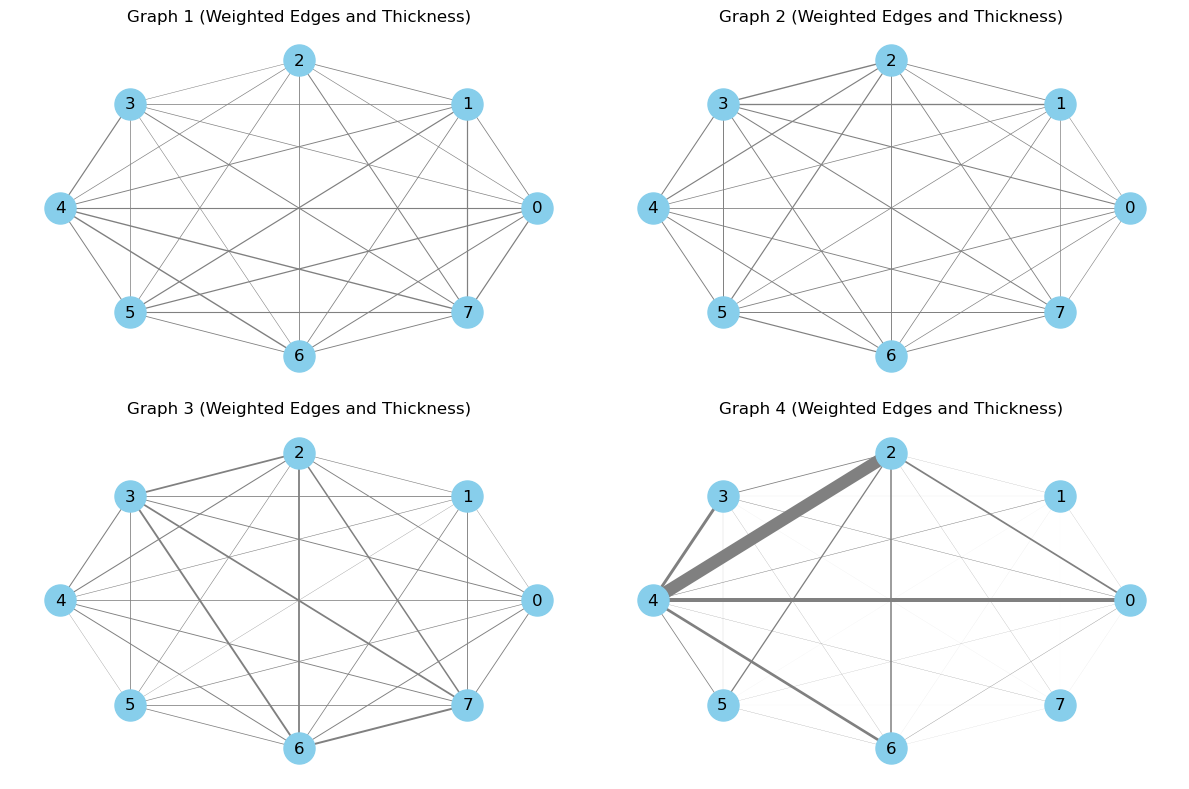

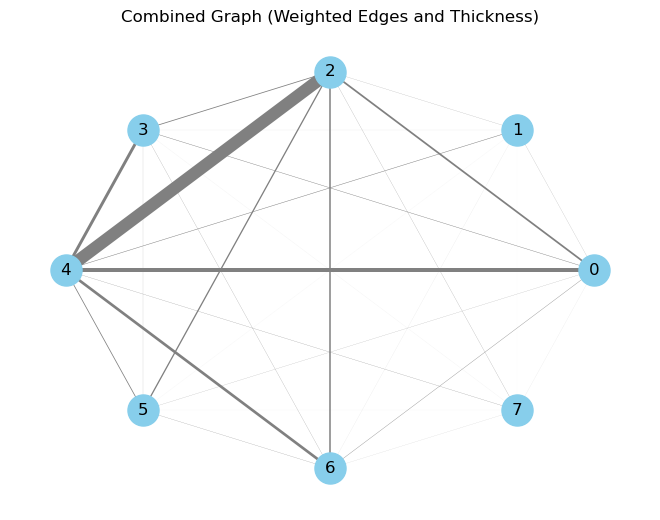

In [48]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
import matplotlib.cm as cm
import numpy as np

# Example: four different datasets of node pairs (replace with your real data)
#datasets = np.array([MI_adj_random[490], MI_adj_greedy[490], MI_adj_mimic[490], MI_adj_landmax[490]]) #MI_adj_landmax[99]]) # Replace these with your actual datasets
datasets = np.array([MI_adj_random_time_avg, MI_adj_greedy_time_avg, MI_adj_mimic_time_avg, MI_adj_landmax_time_avg]) #MI_adj_landmax[99]]) # Replace these with your actual datasets
dataset_titles = ["Random MI", "Greedy MI", "Mimic MI", "Landmax MI"]

# Step 2: Create a graph for each adjacency matrix
G1 = nx.from_numpy_array(datasets[0])
G2 = nx.from_numpy_array(datasets[1])
G3 = nx.from_numpy_array(datasets[2])
G4 = nx.from_numpy_array(datasets[3])
# Step 3: Plot the graphs with weighted edges
plt.figure(figsize=(12, 8))

# Use a common layout for all graphs to have a consistent comparison
pos = nx.circular_layout(G1)

# Step 3: Define a function to adjust edge thickness based on the weights
def draw_graph_with_weights_and_thickness(G, pos, title):
    # Get the edge weights
    edge_weights = nx.get_edge_attributes(G, 'weight')
    
    # Use the edge weights to scale the thickness (choose a scaling factor)
    edge_thickness = [weight * 200 for weight in edge_weights.values()]  # Scale by 2 for visibility
    
    # Draw the nodes and edges with variable edge thickness
    nx.draw(G, pos, with_labels=True, node_color='skyblue', 
            node_size=500, font_size=12, width=edge_thickness, edge_color='gray')
    
    # Draw edge labels (weights)
   # nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_weights, font_color='red', font_size=10)
    plt.title(title)

# Step 4: Plot the graphs with variable edge thickness based on weights
plt.figure(figsize=(12, 8))

 #Use a common layout for all graphs
pos = nx.circular_layout(G1)

plt.subplot(221)
draw_graph_with_weights_and_thickness(G1, pos, "Graph 1 (Weighted Edges and Thickness)")

plt.subplot(222)
draw_graph_with_weights_and_thickness(G2, pos, "Graph 2 (Weighted Edges and Thickness)")

plt.subplot(223)
draw_graph_with_weights_and_thickness(G3, pos, "Graph 3 (Weighted Edges and Thickness)")

plt.subplot(224)
draw_graph_with_weights_and_thickness(G4, pos, "Graph 4 (Weighted Edges and Thickness)")

plt.tight_layout()
plt.show()

#\ Optionally, combine the graphs into one
combined_graph = nx.compose_all([G1, G2, G3, G4])

# Visualize the combined graph with weighted edges and variable thickness
plt.figure()
draw_graph_with_weights_and_thickness(combined_graph, pos, "Combined Graph (Weighted Edges and Thickness)")
plt.show()

In [ ]:
#Same as above but now also returns an adjacency matrix associated with the network

In [26]:
# Example: four different datasets of node pairs (replace with your real data)
datasets = np.array([MI_adj_random_time_avg, MI_adj_greedy_time_avg, MI_adj_mimic_time_avg, MI_adj_landmax_time_avg]) #MI_adj_landmax[99]]) # Replace these with your actual datasets
dataset_titles = ["Random Node Pairs", "Greedy Node Pairs", "Mimic Node Pairs", "Landmax Node Pairs"]

# Function to visualize each dataset
def visualize_network(dataset, ax, title, pos, cmap):
    # Flatten the dataset into a list of tuples representing pairs
    edges = [tuple(sorted(pair)) for sublist in dataset for pair in sublist]
    vmin=0
    vmax=495

    # Count the number of times each node pair appears
    edge_weights = Counter(edges)

    # Create a graph
    G = nx.Graph()

    # Add edges along with their weights
    for edge, weight in edge_weights.items():
        G.add_edge(edge[0], edge[1], weight=weight)

    edges = list(G.edges)

    # Get the edge weights to visualize them
    weights = np.array([G[u][v]['weight'] for u, v in G.edges()])

    # Normalize weights for color mapping
    norm = plt.Normalize(vmin, vmax)

    # Map edge weights to colors using the given colormap
    edge_colors = [cmap(norm(w)) for w in weights]

    # Draw the graph with node labels, use color to represent the weight
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500,
            edge_color=edge_colors, width=2, ax=ax)

    # Draw edge labels to show weights
    nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): d['weight'] for u, v, d in G.edges(data=True)}, ax=ax)

    # Add a color bar to show the weight scale
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    plt.colorbar(sm, ax=ax, label="Edge weight")

    # Add a title to each subplot
    ax.set_title(title)

    n_nodes = max(max(edge) for edge in edges) + 1  # Ensure it covers all nodes
    adj_matrix = np.zeros((n_nodes, n_nodes))

    for (edge, weight) in zip(edges, weights):
        adj_matrix[edge[0], edge[1]] = weight
        adj_matrix[edge[1], edge[0]] = weight
    print(f"Adjacency Matrix for {title}:\n{adj_matrix}\n")
    return adj_matrix
# Define the layout and figure for the subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 12))  # 2x2 grid of subplots

# Generate a consistent node position layout across all datasets
# Flatten the datasets to extract individual nodes, assuming each sublist contains node pairs
all_nodes = set([node for dataset in datasets for sublist in dataset for pair in sublist for node in pair])
G_all = nx.Graph()
G_all.add_nodes_from(all_nodes)
pos = nx.spring_layout(G_all, seed=42)  # Fixed layout for nodes

# Colormaps for each dataset (optional: you can change these)
colormaps = [cm.Blues, cm.Blues, cm.Blues, cm.Blues]

# Store adjacency matrices for further processing
adjacency_matrices = []

# Visualize each dataset in its respective subplot and output the adjacency matrix
for i, dataset in enumerate(datasets):
    row, col = divmod(i, 2)
    adj_matrix = visualize_network(dataset, axs[row, col], dataset_titles[i], pos, colormaps[i])
    #store all adjacency matrices in a list
    adjacency_matrices.append(adj_matrix)  # Store the matrix in a list

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

# Further processing with adjacency_matrices if needed
# Now adjacency_matrices is a list of NumPy arrays


NameError: name 'output_random' is not defined

In [ ]:
#Construct the laplacian for an adjacency matrix !! Note: you have to give one adjacency matrix

In [17]:
def laplacian_eigenvalues_eigenvector(adj_matrix):
    #give G a numpy array
    G = nx.from_numpy_array(adj_matrix)
    
    from scipy.linalg import eigh
    
    laplacians = [nx.laplacian_matrix(G).toarray()]
    
    # Step 2: Compute eigenvalues and eigenvectors for each Laplacian
    eigenvalues = []
    eigenvectors = []
    for lap in laplacians:
        eigvals, eigvecs = eigh(lap)  # eigh for symmetric matrices
        eigenvalues.append(eigvals)
        eigenvectors.append(eigvecs)
    return (eigenvalues,eigenvectors)

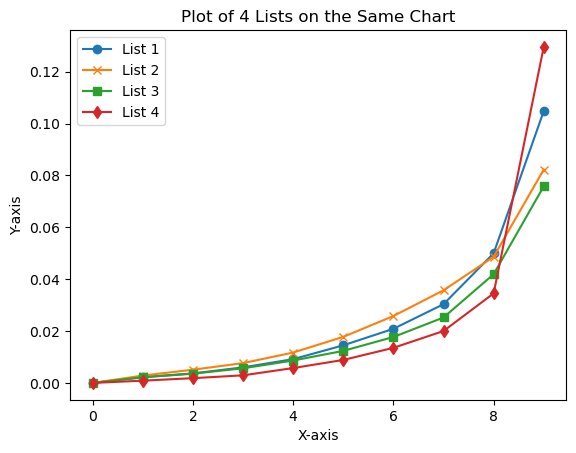

In [80]:
#plot the laplacian eigenvalues for all: The spectra, particularly the spectral gap tell us how connected/disconnected the system is
N = 10
x = list(range(N))  # X-axis points (0, 1, 2, ..., N-1)
y1 = average_laplacian_eigenvalues(np.array(MI_adj_random))[1]    # First list of N points
y2 = average_laplacian_eigenvalues(np.array(MI_adj_greedy))[1]   # Second list
y3 = average_laplacian_eigenvalues(np.array(MI_adj_mimic))[1]  # Third list
y4 = average_laplacian_eigenvalues(np.array(MI_adj_landmax))[1]  # Fourth list

# Plot each list on the same chart
plt.plot(x, y1, label='List 1', marker='o')  # Plot with markers
plt.plot(x, y2, label='List 2', marker='x')
plt.plot(x, y3, label='List 3', marker='s')
plt.plot(x, y4, label='List 4', marker='d')

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Plot of 4 Lists on the Same Chart')

# Add a legend to distinguish between the lists
plt.legend()

# Show the plot
plt.show()

In [ ]:
#Average laplacian eigenvalues. This takes in a set of adjeaceny matrices and returns the average eigenvalues, ie. the average spectra
#consider running this when you want to study eigenvalues of one seed

In [77]:
def average_laplacian_eigenvalues(MI_adj_matrices):
    laplacian_eig_vals =[]
    for i in range (len(MI_adj_matrices)):
        laplacian_eig_vals.append(laplacian_eigenvalues_eigenvector(np.array(MI_adj_matrices[i]))[0][0])
    return (laplacian_eig_vals,np.mean(laplacian_eig_vals,axis=0))
        

In [ ]:
#Returns the average for a whole trial: one trial of a given connectivity, size and rule

In [84]:
def average_laplacian_eigenvalues_full_sim(twoQdms, num_nodes,trials):
    averages_of_each_trial=[]
    for j in range(trials):
        MI_adj_matrices = adjacency_matrices_list_two_dim(twoQdms,j,num_nodes, mutual_info_dicts)
        laplacian_eig_vals =[]
        for i in range (len(MI_adj_matrices)):
            laplacian_eig_vals.append(laplacian_eigenvalues_eigenvector(np.array(MI_adj_matrices[i]))[0][0])
        return (np.mean(laplacian_eig_vals,axis=0))
        average_of_each_trial.append(np.mean(laplacian_eig_vals,axis=0))
    return average_or_each_trial

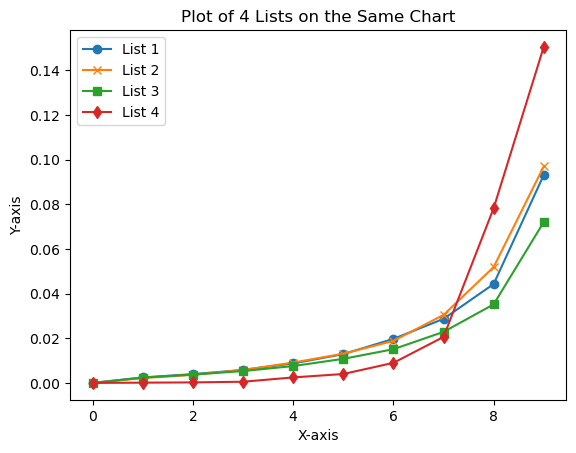

In [100]:
#plot the average eigenvalues
N = 10
x = list(range(N))  # X-axis points (0, 1, 2, ..., N-1)
y1 = average_laplacian_eigenvalues_full_sim(twoQdmsrandom,10,99)   # First list of N points
y2 = average_laplacian_eigenvalues_full_sim(twoQdmsgreedy,10,99)   # Second list
y3 = average_laplacian_eigenvalues_full_sim(twoQdmsmimic,10,99)  # Third list
y4 = average_laplacian_eigenvalues_full_sim(twoQdmslandscape_max,10,99) # Fourth list

# Plot each list on the same chart
plt.plot(x, y1, label='List 1', marker='o')  # Plot with markers
plt.plot(x, y2, label='List 2', marker='x')
plt.plot(x, y3, label='List 3', marker='s')
plt.plot(x, y4, label='List 4', marker='d')

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Plot of 4 Lists on the Same Chart')

# Add a legend to distinguish between the lists
plt.legend()

# Show the plot
plt.show()



In [ ]:
#Clustering and disparity of network as a function of time: Can run with ensemble average set of adjacency matrix

In [145]:
#Clustering Coefficient
def clustering_coeff_function_of_time(adjacency_matrix_list):
    C_list = []
    #adjacency_matrix_list=np.array(adjacency_matrix_list)
    for adj_mat in adjacency_matrix_list:
        adj_mat=np.array(adj_mat)
        M_sq = adj_mat@adj_mat
        sum_of_M_sq = np.sum(M_sq)
        M_cube = adj_mat@adj_mat@adj_mat
        M_cube_trace = np.trace(M_cube)
        C_list.append(M_cube_trace/sum_of_M_sq)
    return(C_list)

#Disparity
def disparity_function_of_time(adjacency_matrix_list, N):
    D_list = []
    for adj_mat in adjacency_matrix_list:
        M_row_sum_squared = np.sum(adj_mat, axis=1)**2
        M_row_sum_of_squared_elements = np.sum(adj_mat**2, axis=1)
        # Check for zero division before performing division
        Di = np.where(M_row_sum_squared != 0, M_row_sum_of_squared_elements / M_row_sum_squared, 0)
        D_list.append(np.sum(Di) / N)
    return D_list

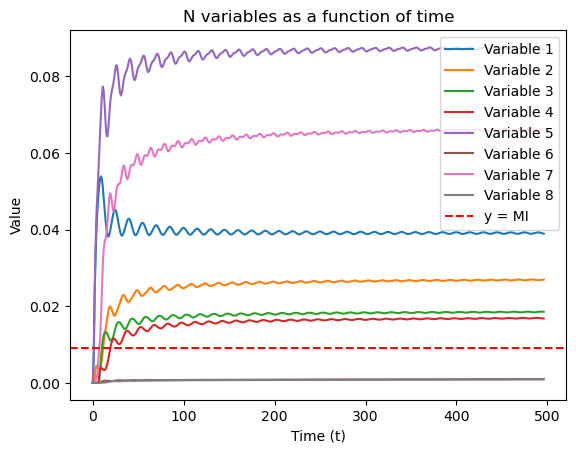

In [51]:
#Total Mutual information on the network. This serves as a measure compared to the maximum mutual information that can develop on network
def MItotal(MI_adj):
    MI_adj_tot=[]
    for i in range(499):
       MI_adj_tot.append(np.sum(MI_adj[i],axis=0))
    return np.array(MI_adj_tot)


data=time_averaged_one_point_measures_matrix_full_sim(MItotal(MI_adj_landmax))
num_time_steps = len(data)-2  # The number of rows in the data corresponds to the number of time steps
t = np.arange(num_time_steps)  # Create a list of time steps [0, 1, 2, ..., num_time_steps-1]

data=np.array(data[1:498])

import matplotlib.pyplot as plt
import numpy as np

data_transposed = data.T  # Now rows are [x1_all_times, x2_all_times, ..., xN_all_times]


# Plot each number as a function of t
for i, y_values in enumerate(data_transposed):
    plt.plot(t, y_values, label=f'Variable {i+1}')

plt.axhline(y=(0.254601)/28, color='r', linestyle='--', label='y = MI')


# Add labels and legend
plt.xlabel('Time (t)')
plt.ylabel('Value')
plt.title('N variables as a function of time')
plt.legend()

# Show the plot
plt.show()

In [ ]:
#Time average mutual information of one qubit with rest of the network

In [ ]:
data1=time_averaged_one_point_measures_matrix_full_sim(np.sum(MItotal(MI_adj_random1),axis=1))
data2=time_averaged_one_point_measures_matrix_full_sim(np.sum(MItotal(MI_adj_random2),axis=1))
data3=time_averaged_one_point_measures_matrix_full_sim(np.sum(MItotal(MI_adj_landmax),axis=1))
data3=time_averaged_one_point_measures_matrix_full_sim(np.sum(MItotal(MI_adj_mimic),axis=1))

num_time_steps = len(data)# The number of rows in the data corresponds to the number of time steps
t = np.arange(499)  # Create a list of time steps [0, 1, 2, ..., num_time_steps-1]

import matplotlib.pyplot as plt
import numpy as np

# Plot each number as a function of t
for y_values in data:
    plt.plot(t, data1)
    plt.plot(t, data2)
    plt.plot(t, data3)

plt.axhline(y=0.254601, color='r', linestyle='--', label='y = MI')


# Add labels and legend
plt.xlabel('Time (t)')
plt.ylabel('Value')
plt.title('N variables as a function of time')
plt.legend()

# Show the plot
plt.show()

In [83]:
from scipy.stats import pearsonr, spearmanr
def normalize_by_row(matrix):
    row_sums = matrix.sum(axis=1)
    normalized_matrix = matrix / row_sums[:, np.newaxis]
    return normalized_matrix

flat_matrix_MI = adj_matrix_MI.flatten()
flat_matrix_IN = adj_matrix_IN.flatten()

# Step 2: Calculate Pearson correlation
pearson_corr, _ = pearsonr(flat_matrix_MI, flat_matrix_IN)
print(f"Pearson Correlation: {pearson_corr}")

# Step 3: Calculate Spearman correlation
spearman_corr, _ = spearmanr(flat_matrix_MI, flat_matrix_IN)
print(f"Spearman Correlation: {spearman_corr}")

Pearson Correlation: -0.10716429018673174
Spearman Correlation: 0.1522126720154731


In [84]:
from sklearn.metrics.pairwise import cosine_similarity

# Step 1: Flatten the adjacency matrices
flat_matrix_MI = (adj_matrix_MI.flatten().reshape(1, -1))
flat_matrix_IN = (adj_matrix_IN.flatten().reshape(1, -1))

# Step 2: Compute cosine similarity
cosine_sim = cosine_similarity(flat_matrix_MI, flat_matrix_IN)
print(f"Cosine Similarity: {cosine_sim[0][0]}")

Cosine Similarity: 0.02052002514519103


In [ ]:
#Time average value for each qubit
def time_averaged_one_point_measures_at_t(dataset,t):
    # Assuming dataset is list of 100 lists i.e. one trial
    #stack datasets in 3D
    # Take the ensemble average along the first axis (averaging over all datasets)
    sum_till_t = np.sum(dataset[:t], axis=0)
    time_average_t = (1/(t+1))*(sum_till_t)
    return (time_average_t)

def time_averaged_one_point_measures_matrix_full_sim(dataset):
    # Take the ensemble average along the first axis (averaging over all datasets)
    time_average=[]
    for t in range(len(dataset)):
        time_average.append(time_averaged_one_point_measures_at_t(dataset,t))
    return (time_average)


In [ ]:
#Polynomial fit

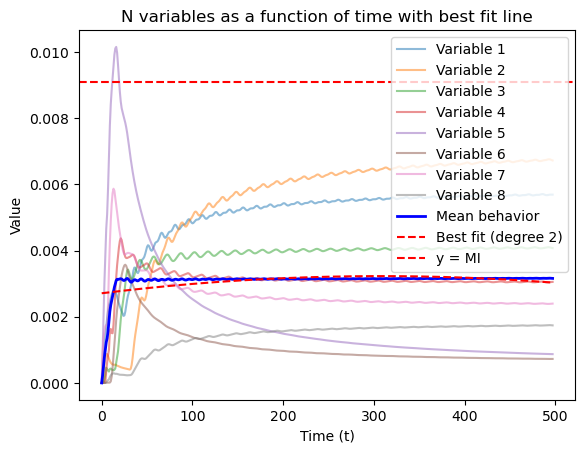

Best fit polynomial (degree 2):             2
-5.467e-09 x + 3.366e-06 x + 0.00271


In [334]:
# Assuming data is extracted and processed already
data = time_averaged_one_point_measures_matrix_full_sim(extract_means(mean_stds_MI_mimic))
num_time_steps = len(data) - 2  # The number of rows in the data corresponds to the number of time steps
t = np.arange(num_time_steps)  # Create a list of time steps [0, 1, 2, ..., num_time_steps-1]

data = np.array(data[1:499])
data_transposed = data.T  # Now rows are [x1_all_times, x2_all_times, ..., xN_all_times]

# Calculate the mean behavior at each time step (mean over all variables)
mean_behavior = np.mean(data_transposed, axis=0)

# Perform a polynomial fit (degree 2 for example, you can adjust this)
degree = 2  # Adjust the degree based on how well the curve fits
coefficients = np.polyfit(t, mean_behavior, degree)
polynomial = np.poly1d(coefficients)

# Generate the fitted values
fitted_values = polynomial(t)

# Plot each variable as a function of time
for i, y_values in enumerate(data_transposed):
    plt.plot(t, y_values, label=f'Variable {i+1}', alpha=0.5)  # Reduce alpha for clarity

# Plot the mean behavior
plt.plot(t, mean_behavior, label='Mean behavior', color='blue', linewidth=2)

# Plot the best-fit line
plt.plot(t, fitted_values, label=f'Best fit (degree {degree})', color='red', linestyle='--')

# Plot the constant line y = MI
#plt.axhline(y=expected value, color='r', linestyle='--', label='y = MI')

# Add labels and legend
plt.xlabel('Time (t)')
plt.ylabel('Value')
plt.title('N variables as a function of time with best fit line')
plt.legend()

# Show the plot
plt.show()

# Print the best fit equation
print(f"Best fit polynomial (degree {degree}): {polynomial}")


In [ ]:
Exponential fit

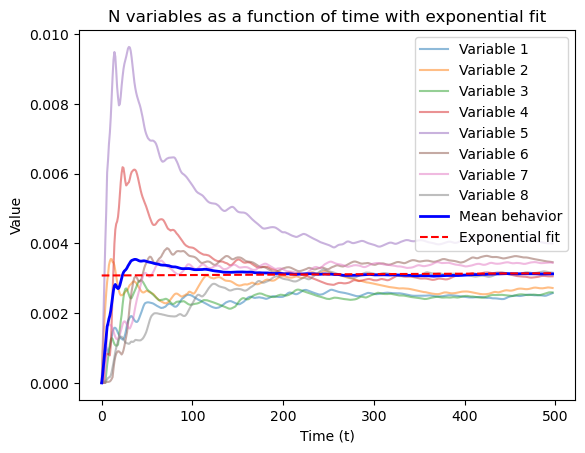

Best fit parameters: a = 0.2680058645041698, b = 4.798711698009281e-07, c = -0.264925333942426


In [335]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the exponential function
def exponential_func(t, a, b, c):
    return a * np.exp(b * t) + c

# Assuming data is already loaded and processed
data = time_averaged_one_point_measures_matrix_full_sim(extract_means(mean_stds_MI_random))
num_time_steps = len(data) - 2  # The number of rows in the data corresponds to the number of time steps
t = np.arange(num_time_steps)  # Create a list of time steps [0, 1, 2, ..., num_time_steps-1]

data = np.array(data[1:499])
data_transposed = data.T  # Now rows are [x1_all_times, x2_all_times, ..., xN_all_times]

# Calculate the mean behavior at each time step (mean over all variables)
mean_behavior = np.mean(data_transposed, axis=0)

# Fit the exponential function to the data
popt, pcov = curve_fit(exponential_func, t, mean_behavior, p0=(1, 0.01, 1))

# Get the fitted parameters
a, b, c = popt

# Generate fitted values
fitted_values = exponential_func(t, *popt)

# Plot each variable as a function of time
for i, y_values in enumerate(data_transposed):
    plt.plot(t, y_values, label=f'Variable {i+1}', alpha=0.5)  # Reduce alpha for clarity

# Plot the mean behavior
plt.plot(t, mean_behavior, label='Mean behavior', color='blue', linewidth=2)

# Plot the best-fit line (exponential)
plt.plot(t, fitted_values, label='Exponential fit', color='red', linestyle='--')

# Add labels and legend
plt.xlabel('Time (t)')
plt.ylabel('Value')
plt.title('N variables as a function of time with exponential fit')
plt.legend()

# Show the plot
plt.show()

# Print the best fit parameters
print(f"Best fit parameters: a = {a}, b = {b}, c = {c}")


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


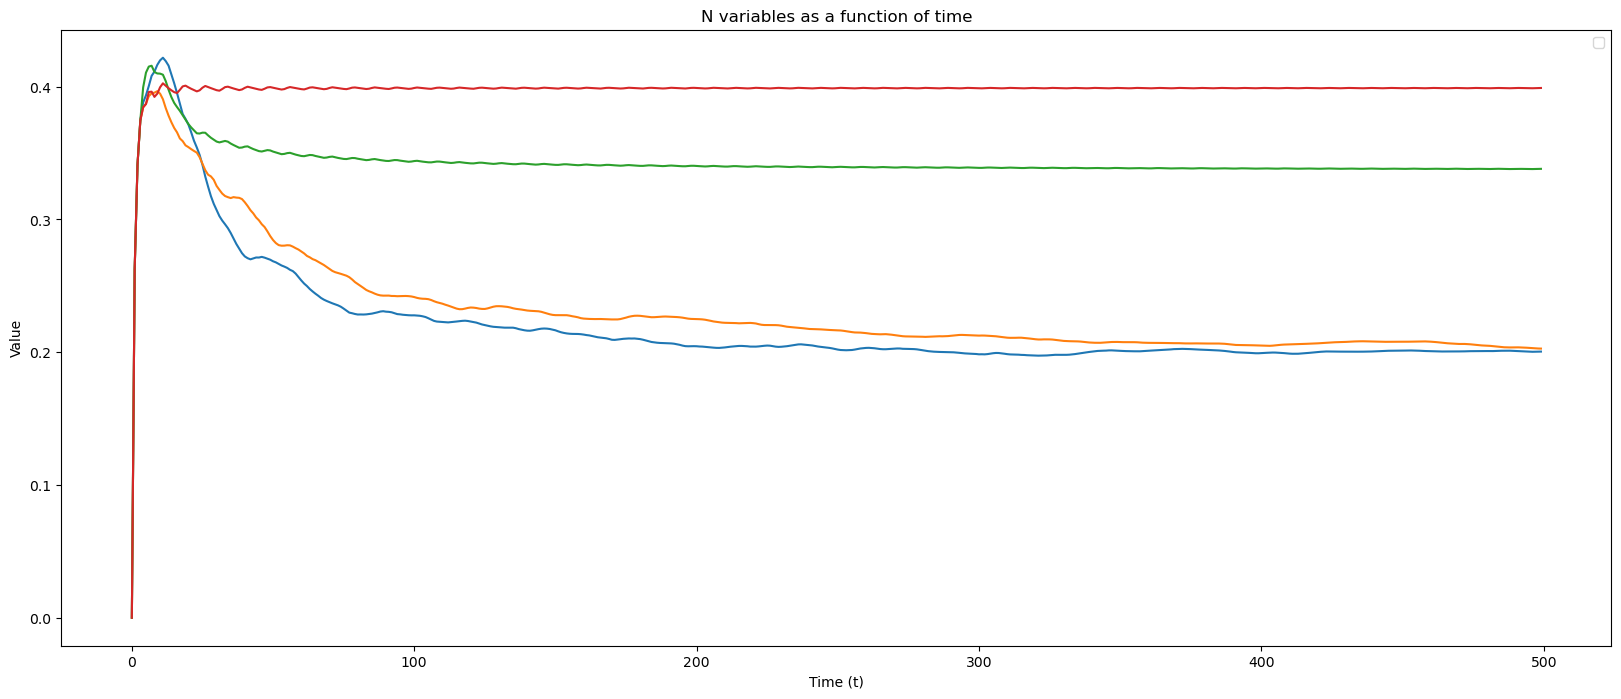